## 1. Linear Regression with Theano

The aim of this IPython notebook is to show some features of the Python **Theano** library in the field of machine learning. It has been developped by the LISA group at the *University of Montreal* (see: http://deeplearning.net/software/theano/). The notebook also relies on other standard Python libraries such as *numpy*, *pandas* and *matplotlib*.

To exemplify the use of **Theano**, this notebook solves the assignments of the *Machine Learning* MOOC provided by **Coursera** (see: https://www.coursera.org/learn/machine-learning) and performed in *Stanford University* by **Andrew Ng** (see: http://www.andrewng.org/).

The original MOOC assignments should to be programmed with the **Octave** language (see: https://www.gnu.org/software/octave/).The idea with this notebook is to provide Python developpers with interesting examples programmed using **Theano**.

This notebook has been developped using the *Anaconda* Python 3.4 distribution provided by **Continuum Analytics** (see: https://www.continuum.io/). It requires the **Jupyter Notebook** (see: http://jupyter.org/).

About the author: **Francis Wolinski** has an Engineering Degree From *Ecole des Ponts ParisTech* as well as a MSc. in Artificial Intelligence and a PhD. in Computer Science from *Université Pierre et Marie Curie* (UPMC).

## 1.1 Linear regression with one variable

#### 1.1.1 Plotting the Data

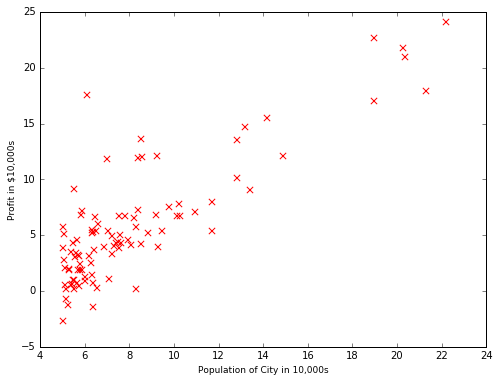

In [1]:
import pandas as pnd
import matplotlib.pyplot as plt
%matplotlib inline

df = pnd.read_csv('data/ex1data1.txt', header=None)
df.columns = ['X', 'Y']
df.plot(kind='scatter', x='X', y='Y', marker='x', s=40, color='red', figsize=(8,6))
plt.xlabel('Population of City in 10,000s', fontsize=9)
plt.ylabel('Profit in $10,000s', fontsize=9)
plt.axis((4, 24, -5, 25))
plt.xticks(range(4,25,2));

#### 1.1.2 Gradient Descent

Cost(0):
32.072733877455654

Cost(1499):
4.483411453374869

Theta found by gradient descent:
[-3.63029144  1.16636235]


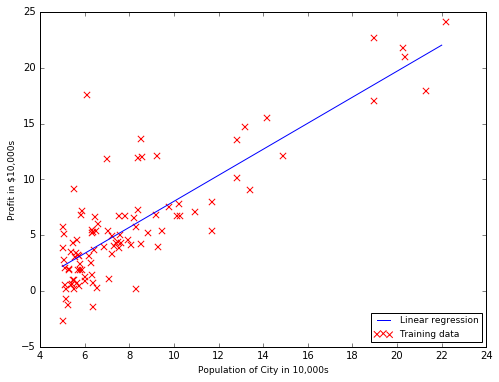

In [2]:
import theano
import numpy as np
import theano.tensor as T
import matplotlib.pyplot as plt

#Training Data
m = df.shape[0]
X = np.matrix([np.ones(m), df["X"].values]) # Add a column of ones to x
Y = df["Y"].values

t = np.array([0.0, 0.0]) # initialize fitting parameters
theta = theano.shared(t,name='theta')

x = T.matrix('x')
y = T.vector('y')

prediction = T.dot(theta,x)
cost = T.sum(T.pow(prediction-y,2))/(2*m)

grad = T.grad(cost,theta)

# Some gradient descent settings
iterations = 1500
alpha = 0.01

train = theano.function([x,y],cost,updates = [(theta,theta-alpha*grad)])
test = theano.function([x],prediction)

for i in range(iterations):
    costM = train(X,Y)
    if i==0:
        print("Cost(%i):" % i)
        print(costM)
print("\nCost(%i):" % i)
print(costM)


print("\nTheta found by gradient descent:")
print(theta.get_value())

# Plot the linear fit
a = np.linspace(5,22,22)
b = test(np.matrix([np.ones(a.shape), a]))
plt.figure(figsize=(8,6))
plt.plot(a,b, label='Linear regression')
plt.scatter(df["X"].values,Y, s=40,marker='x', color='r', label='Training data')
plt.xlabel('Population of City in 10,000s', fontsize=9)
plt.ylabel('Profit in $10,000s', fontsize=9)
plt.legend(loc=4, fontsize=9)
plt.axis((4, 24, -5, 25))
plt.xticks(range(4,25,2));

In [3]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta.get_value())
print('For population = 35,000, we predict a profit of %f' % (predict1*10000))
predict2 = np.dot(np.array([1, 7]), theta.get_value())
print('For population = 70,000, we predict a profit of %f' % (predict2*10000))

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


#### 1.1.3 Visualizing J($\theta$)

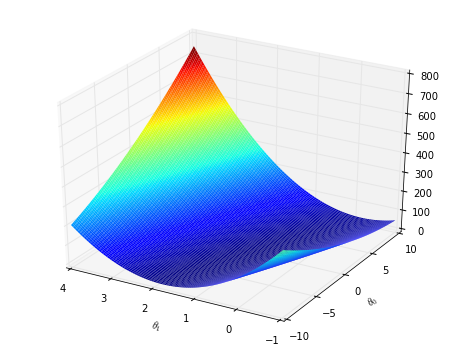

In [4]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta_ = np.array([theta0, theta1])
        J_vals[j,i] = np.sum(np.power(np.dot(theta_,X)-Y,2))/(2*m)

# Surface cost function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
x_vals, y_vals = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(y_vals, x_vals, J_vals, rstride=1, cstride=1, linewidth=0, cmap=cm.jet);
# invert x axis to get the same 3D representation as in Octave
ax.invert_xaxis()
plt.xlabel(r'$\theta_{1}$')
plt.ylabel(r'$\theta_{0}$');

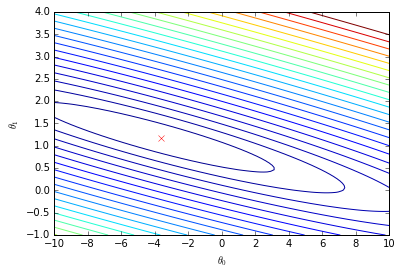

In [5]:
# Contour cost function, showing minimum
levels = [i*i for i in np.arange(25)]
contour = plt.contour(theta0_vals, theta1_vals, J_vals, levels)
plt.plot(theta.get_value()[0], theta.get_value()[1], 'rx')
plt.xlabel(r'$\theta_{0}$')
plt.ylabel(r'$\theta_{1}$')
plt.xticks(np.arange(-10,11,2))
plt.yticks(np.arange(-1,4.5,0.5));

### 1.2 Linear regression with multiple variables

In [6]:
df2 = pnd.read_csv('data/ex1data2.txt', header=None)
df2.columns = ['X1', 'X2', 'Y']
print('First 10 examples from the dataset:')
for i in range(10):
    print(' x = [%i, %i], y = %i ' % (df2.loc[i, 'X1'], df2.loc[i, 'X2'], df2.loc[i, 'Y']))

First 10 examples from the dataset:
 x = [2104, 3], y = 399900 
 x = [1600, 3], y = 329900 
 x = [2400, 3], y = 369000 
 x = [1416, 2], y = 232000 
 x = [3000, 4], y = 539900 
 x = [1985, 4], y = 299900 
 x = [1534, 3], y = 314900 
 x = [1427, 3], y = 198999 
 x = [1380, 3], y = 212000 
 x = [1494, 3], y = 242500 


#### 1.2.1 Feature Normalization

In [7]:
mu = df2.mean()
sigma = df2.std()
df3 = (df2 - mu)/sigma

#### 1.2.2 Gradient Descent

In [8]:
#Training Data
m = df3.shape[0]
Xnorm = np.matrix([np.ones(m), df3["X1"].values, df3["X2"].values]) # Add intercept term to X
Y = df2["Y"].values

# Choose some alpha value
alpha = 0.01
num_iters = 5000

# Init Theta and Run Gradient Descent 
t = np.zeros(3)
theta = theano.shared(t,name='theta')

x = T.matrix('x')
y = T.vector('y')

prediction = T.dot(theta,x)
cost = T.sum(T.pow(prediction-y,2))/(2*m)
grad = T.grad(cost,theta)
train = theano.function([x,y],cost,updates = [(theta,theta-alpha*grad)])

for i in range(num_iters):
    costM = train(Xnorm,Y)

print("Theta found by gradient descent:")
print(theta.get_value())

Theta found by gradient descent:
[ 340412.65957447  110631.05025395   -6649.47424592]


In [9]:
# Predict values for 1650 sq-ft and 3 bedrooms
# Need to normalize data
X0 = np.array([1, (1650 - mu['X1'])/sigma['X1'], (3 - mu['X2'])/sigma['X2']])
price = np.dot(theta.get_value(), X0)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n$%f' % price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
$293081.464340


#### 1.2.3 Selecting learning rates

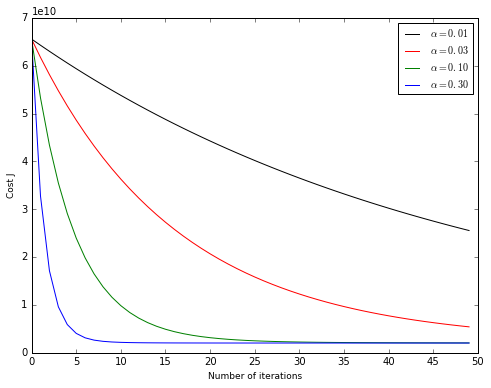

In [10]:
num_iters = 50

x = T.matrix('x')
y = T.vector('y')

alphas = [0.01, 0.03, 0.10, 0.30]
colors = ['k', 'r', 'g', 'b']
l = len(alphas)
costM = np.zeros((l, 50))
for j, alpha in enumerate(alphas):
    # Init Theta and Run Gradient Descent 
    t = np.zeros(3)
    theta = theano.shared(t,name='theta')
    prediction = T.dot(theta,x)
    cost = T.sum(T.pow(prediction-y,2))/(2*m)
    grad = T.grad(cost,theta)
    train = theano.function([x,y],cost,updates = [(theta,theta-alpha*grad)])
    for i in range(num_iters):
        costM[j, i] = train(Xnorm,Y)

plt.figure(figsize=(8,6))

for j, alpha in enumerate(alphas):
    plt.plot(costM[j], color=colors[j], label = r'$\alpha = %.2f$' % alpha)

plt.xlabel('Number of iterations', fontsize=9)
plt.ylabel('Cost J', fontsize=9)
plt.legend(fontsize=10)
plt.xticks(range(0,51,5));

#### 1.2.4 Normal Equations

In [11]:
from numpy.linalg import pinv
# Add intercept term to X
X = np.matrix([np.ones(m), df2["X1"].values, df2["X2"].values])
# Calculate the parameters from the normal equation
theta = np.dot(np.dot(pinv(np.dot(X.T, X)),X.T).T, Y)
print('Theta computed from the normal equations:')
print(theta)
X0 = np.array([1, 1650, 3])
price = np.dot(theta, X0)
print('\nPredicted price of a 1650 sq-ft, 3 br house (using normal equations):\n$%f' % price)

Theta computed from the normal equations:
[[ 89597.90955554    139.21067402  -8738.01911785]]

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
$293081.464335
